<a href="https://colab.research.google.com/github/EmiljaB/Imputers_Heart-Diseases/blob/Iterative-Imputer/IterativeImputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 8 IterativeImputer
#### Emilja Beneja -101539668
### *Note: I have not included the part with the four datasets here as it was identical with the previous notebook.*
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("heart_disease.csv")
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
non_null_counts = df.notnull().sum()
data_types = df.dtypes

for i, column in enumerate(df.columns):
    print(f"{i:<2} {column:<18} {non_null_counts[column]} non-null   {data_types[column]}")

0  male               4238 non-null   int64
1  age                4238 non-null   int64
2  education          4133 non-null   float64
3  currentSmoker      4238 non-null   int64
4  cigsPerDay         4209 non-null   float64
5  BPMeds             4185 non-null   float64
6  prevalentStroke    4238 non-null   int64
7  prevalentHyp       4238 non-null   int64
8  diabetes           4238 non-null   int64
9  totChol            4188 non-null   float64
10 sysBP              4238 non-null   float64
11 diaBP              4238 non-null   float64
12 BMI                4219 non-null   float64
13 heartRate          4237 non-null   float64
14 glucose            3850 non-null   float64
15 TenYearCHD         4238 non-null   int64


In [ ]:
for i in range(len(df.columns)):
    missing_data = df.iloc[:, i].isnull().sum()
    # Calculate the percentage of missing values
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


<Axes: >

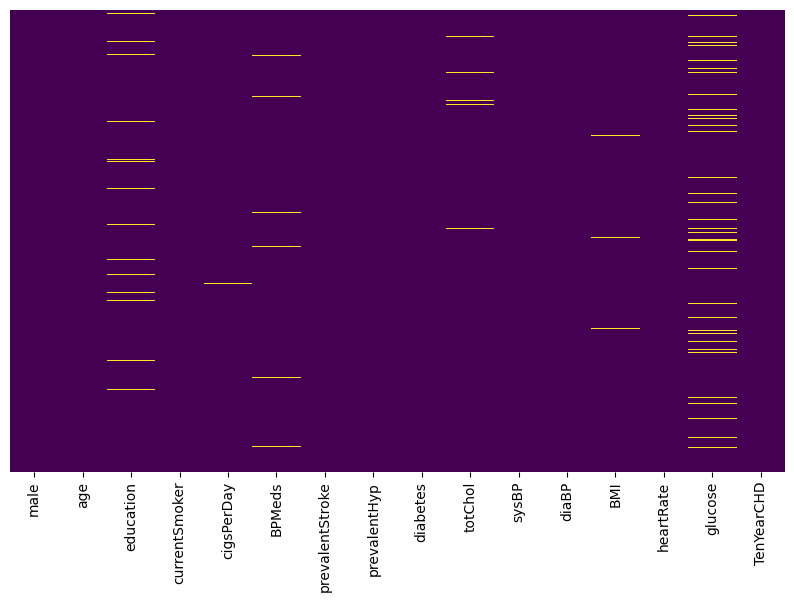

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import IterativeImputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Create IterativeImputer object with max_iterations and random_state=0

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

### Optional - converting df into numpy array

In [ ]:
data = df.values

In [ ]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to perform iterative multivariate imputation

In [ ]:
imputer.fit(X)

IterativeImputer(random_state=0)

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values using transform( )

In [ ]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [ ]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")

Missing cells: 645


In [ ]:
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 0


### Let's try to visualize the missing values.

In [ ]:
df_transform = pd.DataFrame(data=X_transform)
df_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.00000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.00000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.00000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.00000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.00000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.00000
4235,0.0,48.0,2.0,1.0,20.0,0.01547,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.00000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.74894


<Axes: >

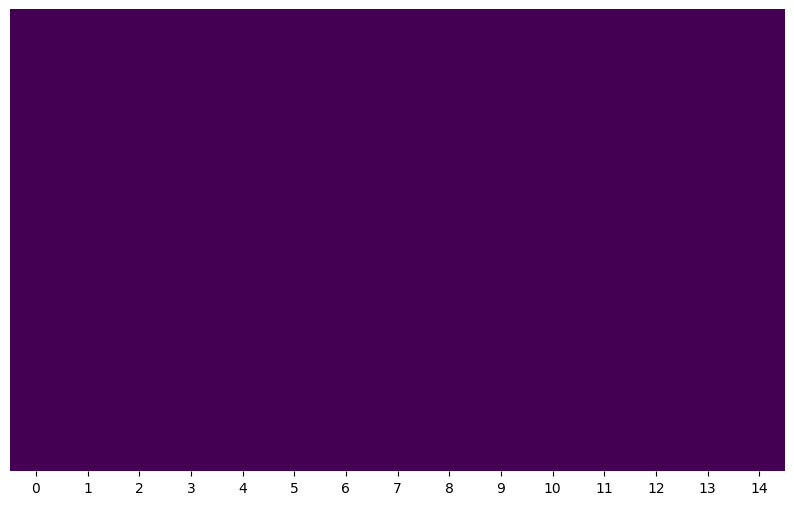

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Build a Logistic Regression model Without imputation

In [ ]:
df=pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
df.shape

(4238, 16)

In [ ]:
df.dropna(inplace=True)
df.shape

(3656, 16)

In [ ]:
df.dropna(inplace=True)
df.shape

(3656, 16)

### Create a pipeline with model parameter

In [ ]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),                  # Scale the features
    ('classifier', LogisticRegression())           # Logistic Regression model
])

# Build a Logistic Regression model without SimpleImputer Mean Strategy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv("heart_disease.csv")


In [ ]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Drop rows with missing values in both X and y
X = X.dropna()
y = y[X.index]  # Align y with the indices of the cleaned X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and LogisticRegression (no imputer)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),                  # Scale the features
    ('classifier', LogisticRegression())           # Logistic Regression model
])

# Create the RepeatedStratifiedKFold object
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Call cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=rskf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Fit the pipeline to the training data and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.86006826 0.86006826 0.85324232 0.85665529 0.86986301 0.85273973
 0.84589041 0.8630137  0.85616438 0.8390411  0.86348123 0.85324232
 0.85665529 0.85665529 0.84931507 0.85616438 0.84931507 0.85616438
 0.86643836 0.84931507 0.8668942  0.84982935 0.85324232 0.84982935
 0.84931507 0.85273973 0.84931507 0.84931507 0.85616438 0.85958904]
Mean accuracy: 0.8549908831642433
Standard deviation: 0.006633202465028368

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



# Build a Logistic Regression model with IterativeImputer


In [ ]:
from sklearn.impute import IterativeImputer
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with IterativeImputer, StandardScaler, and LogisticRegression
pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),  # Impute missing values using Iterative Imputer
    ('scaler', StandardScaler()),                                   # Scale the features
    ('classifier', LogisticRegression())                            # Logistic Regression model
])

# Create the RepeatedStratifiedKFold object
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Call cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=rskf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Fit the pipeline to the training data and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.85840708 0.84660767 0.84955752 0.86135693 0.85545723 0.85545723
 0.84955752 0.84660767 0.85840708 0.85545723 0.83480826 0.86725664
 0.84660767 0.84955752 0.84955752 0.85250737 0.85545723 0.86725664
 0.85250737 0.84660767 0.85545723 0.85545723 0.85250737 0.84660767
 0.84365782 0.84955752 0.86135693 0.86430678 0.86430678 0.83775811]
Mean accuracy: 0.8529990167158308
Standard deviation: 0.007770433864358057

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.62      0.08      0.14       124

    accuracy                           0.86       848
   macro avg       0.74      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848



### Which accuracy is better?
- Dropping missing values = 0.84
- IterativeImputer with Mean Strategy = 0.86
### Answer: Iterative imputer

# IterativeImputer with RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with IterativeImputer, StandardScaler, and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),  # Impute missing values using Iterative Imputer
    ('scaler', StandardScaler()),                                   # Scale the features
    ('classifier', RandomForestClassifier(random_state=0))         # Random Forest model
])

# Create the RepeatedStratifiedKFold object
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Call cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=rskf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Fit the pipeline to the training data and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84955752 0.84955752 0.83775811 0.85545723 0.84070796 0.84070796
 0.84365782 0.84955752 0.84070796 0.84365782 0.83480826 0.84365782
 0.84955752 0.84070796 0.84660767 0.84660767 0.84660767 0.84660767
 0.84070796 0.85250737 0.84955752 0.84955752 0.85250737 0.84955752
 0.84070796 0.84070796 0.85545723 0.83775811 0.85840708 0.84660767]
Mean accuracy: 0.8460176991150442
Standard deviation: 0.005719976232939617

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       724
           1       0.62      0.10      0.18       124

    accuracy                           0.86       848
   macro avg       0.74      0.55      0.55       848
weighted avg       0.83      0.86      0.81       848



# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant
- Iterative

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice
(Gradient Boosting Classifier)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
# Select features and target
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Drop rows with missing values in y (if any)
y = y.dropna()  # Ensure target variable doesn't contain missing values
X = X.loc[y.index]  # Align X with cleaned y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputer strategies and models
imputer_strategies = ['mean', 'median', 'most_frequent', 'constant', 'iterative']
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create the RepeatedStratifiedKFold object
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Experiment
for strategy in imputer_strategies:
    for model_name, model in models.items():
        # Create a pipeline with imputer, scaler, and the current model
        if strategy == 'iterative':
            # Use IterativeImputer for the 'iterative' strategy
            imputer = IterativeImputer(max_iter=10, random_state=0)
        else:
            # Use SimpleImputer for other strategies
            imputer = SimpleImputer(strategy=strategy)

        pipeline = Pipeline(steps=[
            ('imputer', imputer),        # Impute missing values with the chosen strategy
            ('scaler', StandardScaler()), # Scale the features
            ('classifier', model)         # Current model
        ])

        # Call cross_val_score
        scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=rskf)

        # Print the results
        print(f"Imputer: {strategy}, Model: {model_name} >> Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Imputer: mean, Model: Logistic Regression >> Mean Accuracy: 0.8529, Std Dev: 0.0078
Imputer: mean, Model: KNN >> Mean Accuracy: 0.8329, Std Dev: 0.0097
Imputer: mean, Model: Random Forest >> Mean Accuracy: 0.8473, Std Dev: 0.0083
Imputer: mean, Model: SVM >> Mean Accuracy: 0.8457, Std Dev: 0.0032
Imputer: mean, Model: Gradient Boosting >> Mean Accuracy: 0.8471, Std Dev: 0.0088
Imputer: median, Model: Logistic Regression >> Mean Accuracy: 0.8529, Std Dev: 0.0079
Imputer: median, Model: KNN >> Mean Accuracy: 0.8341, Std Dev: 0.0087
Imputer: median, Model: Random Forest >> Mean Accuracy: 0.8484, Std Dev: 0.0074
Imputer: median, Model: SVM >> Mean Accuracy: 0.8457, Std Dev: 0.0032
Imputer: median, Model: Gradient Boosting >> Mean Accuracy: 0.8461, Std Dev: 0.0084
Imputer: most_frequent, Model: Logistic Regression >> Mean Accuracy: 0.8533, Std Dev: 0.0081
Imputer: most_frequent, Model: KNN >> Mean Accuracy: 0.8331, Std Dev: 0.0090
Imputer: most_frequent, Model: Random Forest >> Mean Accurac

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- SimpleImputer(Mean)
- SimpleImputer(Median)
- SimpleImputer(Most_frequent)
- SimpleImputer(Constant)
- IterativeImputer
# Q2:  Which is the best algorithm for this dataset using IterativeImputer?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)
# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant, IterativeImputer
- Logistic Regression, Random Forest, KNN

# Answer
### - Best Strategy:
#### Most Frequent:
##### Mean Accuracy: 0.8533
##### Standard Deviation: 0.0081
### - Best Algorithm:
#### Logistic Regression:
##### Highest Accuracy: 0.8533
###  - Best Combination:
Most Frequent with Logistic Regression
